<h2 align="center" style="color:purple">Atliq Hotels Data Analysis Project</h2>

<h2 align="left" style="color:red">Data Import in Jupyter Notebook</h2>

In [700]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [701]:
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [702]:
df_bookings.shape

(134590, 12)

In [703]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


<h2 align="left" style="color:red">Data Exploration</h2>

In [705]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [706]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

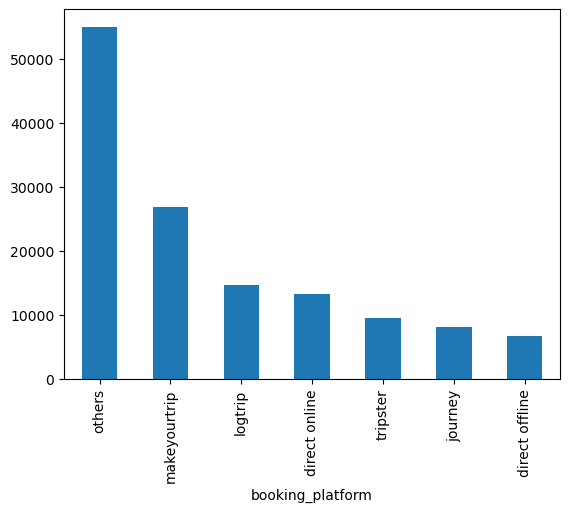

In [707]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [708]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [709]:
df_bookings.room_category.value_counts()

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

<Axes: ylabel='room_category'>

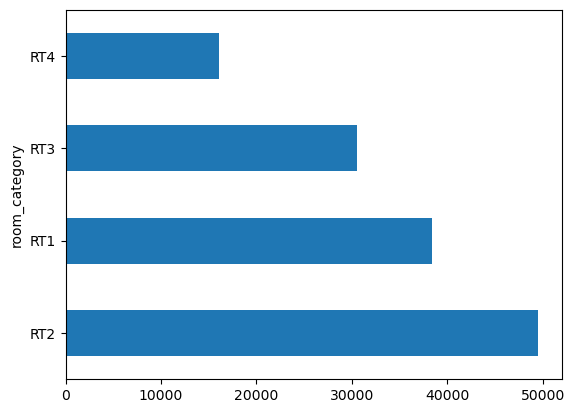

In [710]:
df_bookings.room_category.value_counts().plot(kind="barh")

In [711]:
df_date = pd.read_csv("dim_date.csv")
df_hotels = pd.read_csv("dim_hotels.csv")
df_rooms = pd.read_csv("dim_rooms.csv")
df_agrtd_bookings = pd.read_csv("fact_aggregated_bookings.csv")

In [712]:
df_hotels.shape

(25, 4)

In [713]:
df_hotels.sample(7)

,property_id,property_name,category,city
6,17558,Atliq Grands,Luxury,Mumbai
16,18562,Atliq Bay,Luxury,Hyderabad
3,16561,Atliq Blu,Luxury,Delhi
2,16560,Atliq City,Business,Delhi
7,17559,Atliq Exotica,Luxury,Mumbai
0,16558,Atliq Grands,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi


In [714]:
df_hotels.category.value_counts().sort_values()

category
Business     9
Luxury      16
Name: count, dtype: int64

<Axes: xlabel='city'>

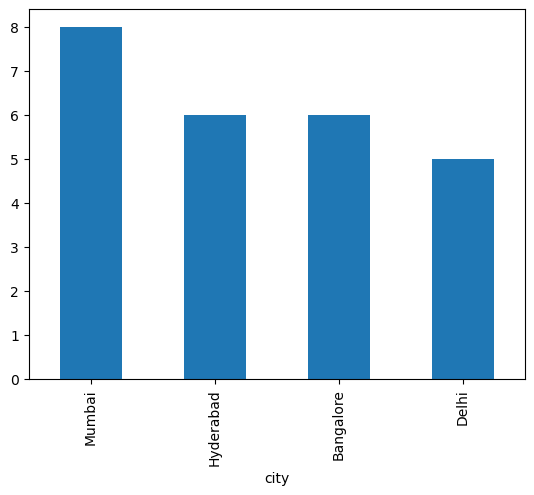

In [715]:
df_hotels.city.value_counts().plot(kind="bar")

In [716]:
df_agrtd_bookings.sample(7)

,property_id,check_in_date,room_category,successful_bookings,capacity
4488,18558,14-Jun-22,RT4,10,20.0
834,16559,9-May-22,RT2,28,41.0
5646,18560,26-Jun-22,RT2,36,40.0
6260,18561,2-Jul-22,RT3,22,25.0
2894,16563,29-May-22,RT4,12,18.0
5814,17559,28-Jun-22,RT1,18,32.0
7361,19558,13-Jul-22,RT3,8,21.0


In [717]:
df_agrtd_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [718]:
df_agrtd_bookings.groupby('property_id')["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [719]:
df_agrtd_bookings[df_agrtd_bookings.successful_bookings > df_agrtd_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [720]:
df_agrtd_bookings.groupby('property_id')["capacity"].max().sort_values()

property_id
16558    22.0
16561    24.0
18563    29.0
17562    30.0
19562    30.0
18558    30.0
16560    34.0
17561    36.0
19560    38.0
18562    38.0
17559    39.0
19558    40.0
18561    40.0
18560    40.0
17564    40.0
16563    41.0
19559    41.0
16559    41.0
16562    43.0
17563    44.0
18559    44.0
17560    45.0
19561    45.0
19563    45.0
17558    50.0
Name: capacity, dtype: float64

In [721]:
df_agrtd_bookings[df_agrtd_bookings.capacity==df_agrtd_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


<h2 align="left" style="color:red">Data Cleaning</h2>

In [723]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [724]:
df_bookings[df_bookings.no_guests < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [725]:
df_bookings = df_bookings[df_bookings.no_guests > 0]

In [726]:
df_bookings.shape

(134578, 12)

In [727]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [728]:
avg, std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [729]:
avg, std

(15378.036937686695, 93040.15493143328)

In [730]:
high_rev_lim = avg + (3 * std)
high_rev_lim

294498.50173198653

In [731]:
low_rev_lim = avg - (3 * std)
low_rev_lim

-263742.4278566132

In [732]:
df_bookings[df_bookings.revenue_generated < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [733]:
df_bookings[df_bookings.revenue_generated  > high_rev_lim]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [734]:
df_bookings = df_bookings[df_bookings.revenue_generated  < high_rev_lim]

In [735]:
df_bookings[df_bookings.revenue_generated  > high_rev_lim]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [736]:
df_bookings.shape

(134573, 12)

In [737]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [738]:
high_rr_lim = df_bookings.revenue_realized.mean() + ( 3 * df_bookings.revenue_realized.std() )
high_rr_lim

33479.3586618449

In [739]:
low_rr_lim = df_bookings.revenue_realized.mean() - ( 3 * df_bookings.revenue_realized.std() )
low_rr_lim

-8087.391491610155

In [740]:
df_bookings[df_bookings.revenue_realized  > high_rr_lim]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [741]:
df_bookings[df_bookings.revenue_realized  > high_rr_lim].room_category.value_counts()

room_category
RT4    1299
Name: count, dtype: int64

In [742]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [743]:
df_bookings[df_bookings.room_category == "RT4"].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [744]:
high = 23439.308444 + ( 3 * 9048.599076 )
high

50585.105672000005

In [745]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [746]:
df_agrtd_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [747]:
df_agrtd_bookings[df_agrtd_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [748]:
df_agrtd_bookings[df_agrtd_bookings.room_category == "RT1"].capacity.median()

30.0

In [749]:
df_agrtd_bookings.capacity.fillna( df_agrtd_bookings[df_agrtd_bookings.room_category == "RT1"].capacity.median() , inplace=True )

In [750]:
df_agrtd_bookings.loc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,30.0
14,17562,1-May-22,RT1,12,30.0


In [751]:
df_agrtd_bookings[df_agrtd_bookings.successful_bookings > df_agrtd_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [752]:
df_agrtd_bookings.shape

(9200, 5)

In [753]:
df_agrtd_bookings = df_agrtd_bookings[df_agrtd_bookings.successful_bookings <= df_agrtd_bookings.capacity]

In [754]:
df_agrtd_bookings.shape

(9194, 5)

<h2 align="left" style="color:red">Data Transformation</h2>

In [756]:
df_agrtd_bookings.sample(7)

,property_id,check_in_date,room_category,successful_bookings,capacity
2213,16562,23-May-22,RT1,16,31.0
8019,18562,20-Jul-22,RT1,21,38.0
8683,19559,26-Jul-22,RT4,1,3.0
3535,19559,5-Jun-22,RT2,29,41.0
5157,16559,21-Jun-22,RT3,16,32.0
7484,19560,14-Jul-22,RT4,10,16.0
5500,16559,25-Jun-22,RT1,20,30.0


In [757]:
df_agrtd_bookings["Occ_Perc"] = df_agrtd_bookings.successful_bookings / df_agrtd_bookings.capacity

In [758]:
df_agrtd_bookings.sample(7)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Perc
878,16560,9-May-22,RT4,4,7.0,0.571429
1933,16563,20-May-22,RT2,19,38.0,0.500000
8497,19558,24-Jul-22,RT4,3,7.0,0.428571
6851,19562,8-Jul-22,RT3,21,29.0,0.724138
7931,16558,19-Jul-22,RT2,11,22.0,0.500000
3021,19559,31-May-22,RT1,9,24.0,0.375000
2942,17562,30-May-22,RT2,9,30.0,0.300000


In [759]:
df_agrtd_bookings["Occ_Perc"] = df_agrtd_bookings["Occ_Perc"].apply( lambda x : round( x * 100 , 2 ) )

In [760]:
df_agrtd_bookings.sample(7)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Perc
5378,16558,23-Jun-22,RT4,2,3.0,66.67
7632,19560,16-Jul-22,RT2,36,38.0,94.74
5440,18559,24-Jun-22,RT2,12,44.0,27.27
8481,18561,24-Jul-22,RT4,7,9.0,77.78
7353,18562,13-Jul-22,RT3,18,29.0,62.07
3146,18560,1-Jun-22,RT2,21,40.0,52.50
1213,16562,13-May-22,RT1,14,31.0,45.16


In [761]:
df_agrtd_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9194 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   Occ_Perc             9194 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 502.8+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

<h2 align="left" style="color:red">Insights Generation</h2>

### 1. What is an average occupancy rate in each of the room categories?

In [765]:
df_agrtd_bookings.groupby("room_category")["Occ_Perc"].mean()

room_category
RT1    57.879769
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: Occ_Perc, dtype: float64

In [766]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [767]:
df = pd.merge( df_agrtd_bookings , df_rooms, left_on="room_category", right_on="room_id" )
df.sample(7)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Perc,room_id,room_class
7548,19561,15-Jul-22,RT3,13,29.0,44.83,RT3,Premium
3146,19561,1-Jun-22,RT2,20,45.0,44.44,RT2,Elite
6691,16559,6-Jul-22,RT4,12,18.0,66.67,RT4,Presidential
1672,19560,17-May-22,RT3,11,19.0,57.89,RT3,Premium
3915,18558,9-Jun-22,RT1,8,15.0,53.33,RT1,Standard
7845,19563,18-Jul-22,RT2,20,45.0,44.44,RT2,Elite
6486,18562,4-Jul-22,RT4,14,20.0,70.00,RT4,Presidential


In [768]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9194 entries, 0 to 9193
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   Occ_Perc             9194 non-null   float64
 6   room_id              9194 non-null   object 
 7   room_class           9194 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 574.8+ KB


In [769]:
df.groupby("room_class")["Occ_Perc"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.879769
Name: Occ_Perc, dtype: float64

In [770]:
df.drop("room_id", axis=1, inplace=True)
df.sample(7)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Perc,room_class
2532,16559,26-May-22,RT2,26,41.0,63.41,Elite
7575,19563,15-Jul-22,RT4,4,6.0,66.67,Presidential
7697,18560,17-Jul-22,RT1,22,30.0,73.33,Standard
5126,16562,21-Jun-22,RT2,21,43.0,48.84,Elite
2670,19560,27-May-22,RT3,12,19.0,63.16,Premium
4243,18561,12-Jun-22,RT2,32,40.0,80.00,Elite
1895,19558,19-May-22,RT4,3,7.0,42.86,Presidential


### 2. Print Average Occupancy rate per city

In [772]:
df_hotels.sample(7)

,property_id,property_name,category,city
16,18562,Atliq Bay,Luxury,Hyderabad
6,17558,Atliq Grands,Luxury,Mumbai
4,16562,Atliq Bay,Luxury,Delhi
7,17559,Atliq Exotica,Luxury,Mumbai
15,18561,Atliq Blu,Luxury,Hyderabad
11,17563,Atliq Palace,Business,Mumbai
24,17564,Atliq Seasons,Business,Mumbai


In [773]:
df2 = pd.merge(df, df_hotels, on= "property_id")

In [774]:
df2.sample(7)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Perc,room_class,property_name,category,city
206,19558,3-May-22,RT1,20,40.0,50.00,Standard,Atliq Grands,Luxury,Bangalore
3448,19563,4-Jun-22,RT3,21,29.0,72.41,Premium,Atliq Palace,Business,Bangalore
9014,18561,30-Jul-22,RT1,26,33.0,78.79,Standard,Atliq Blu,Luxury,Hyderabad
7126,16561,11-Jul-22,RT2,16,24.0,66.67,Elite,Atliq Blu,Luxury,Delhi
1821,19561,19-May-22,RT1,15,36.0,41.67,Standard,Atliq Blu,Luxury,Bangalore
4398,18560,14-Jun-22,RT1,21,30.0,70.00,Standard,Atliq City,Business,Hyderabad
6157,18560,1-Jul-22,RT3,16,24.0,66.67,Premium,Atliq City,Business,Hyderabad


In [775]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9194 entries, 0 to 9193
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9194 non-null   int64  
 1   check_in_date        9194 non-null   object 
 2   room_category        9194 non-null   object 
 3   successful_bookings  9194 non-null   int64  
 4   capacity             9194 non-null   float64
 5   Occ_Perc             9194 non-null   float64
 6   room_class           9194 non-null   object 
 7   property_name        9194 non-null   object 
 8   category             9194 non-null   object 
 9   city                 9194 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 718.4+ KB


In [776]:
df2.groupby("city")["Occ_Perc"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.901478
Name: Occ_Perc, dtype: float64

<Axes: xlabel='city'>

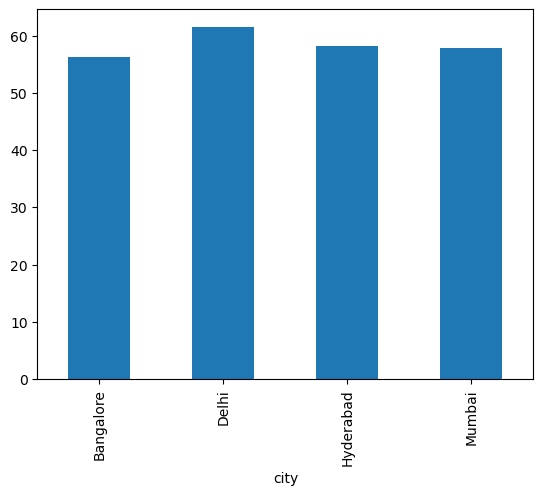

In [777]:
df2.groupby("city")["Occ_Perc"].mean().plot(kind="bar")

### 3. When was the Occupancy better? Weekday or Weekend?

In [779]:
df_date.sample(7)

,date,mmm yy,week no,day_type
69,09-Jul-22,Jul 22,W 28,weekend
57,27-Jun-22,Jun 22,W 27,weekeday
47,17-Jun-22,Jun 22,W 25,weekeday
84,24-Jul-22,Jul 22,W 31,weekend
42,12-Jun-22,Jun 22,W 25,weekend
18,19-May-22,May 22,W 21,weekeday
37,07-Jun-22,Jun 22,W 24,weekeday


In [780]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [781]:
df3 = pd.merge( df2, df_date, left_on = "check_in_date", right_on = "date")
df3.sample(7)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Perc,room_class,property_name,category,city,date,mmm yy,week no,day_type
6473,17562,31-Jul-22,RT4,2,6.0,33.33,Presidential,Atliq Bay,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend
1855,17562,28-May-22,RT3,18,27.0,66.67,Premium,Atliq Bay,Luxury,Mumbai,28-May-22,May 22,W 22,weekend
862,19558,18-May-22,RT3,8,21.0,38.10,Premium,Atliq Grands,Luxury,Bangalore,18-May-22,May 22,W 21,weekeday
793,18563,17-May-22,RT4,7,18.0,38.89,Presidential,Atliq Palace,Business,Hyderabad,17-May-22,May 22,W 21,weekeday
1462,19560,24-May-22,RT3,13,19.0,68.42,Premium,Atliq City,Business,Bangalore,24-May-22,May 22,W 22,weekeday
1994,16563,29-May-22,RT4,12,18.0,66.67,Presidential,Atliq Palace,Business,Delhi,29-May-22,May 22,W 23,weekend
427,17561,14-May-22,RT2,30,36.0,83.33,Elite,Atliq Blu,Luxury,Mumbai,14-May-22,May 22,W 20,weekend


In [782]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          6497 non-null   int64  
 1   check_in_date        6497 non-null   object 
 2   room_category        6497 non-null   object 
 3   successful_bookings  6497 non-null   int64  
 4   capacity             6497 non-null   float64
 5   Occ_Perc             6497 non-null   float64
 6   room_class           6497 non-null   object 
 7   property_name        6497 non-null   object 
 8   category             6497 non-null   object 
 9   city                 6497 non-null   object 
 10  date                 6497 non-null   object 
 11  mmm yy               6497 non-null   object 
 12  week no              6497 non-null   object 
 13  day_type             6497 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 710.7+ KB


In [783]:
df3.groupby("day_type")['Occ_Perc'].mean()

day_type
weekeday    50.883140
weekend     72.343625
Name: Occ_Perc, dtype: float64

### 4. In the month of June, What is the Occupancy for different cities ?

In [785]:
df_date['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [786]:
df3['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [787]:
df_jun = df3[ df3['mmm yy'] == 'Jun 22' ]
df_jun.sample(7)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Perc,room_class,property_name,category,city,date,mmm yy,week no,day_type
3226,17558,20-Jun-22,RT2,21,50.0,42.00,Elite,Atliq Grands,Luxury,Mumbai,20-Jun-22,Jun 22,W 26,weekeday
3944,18561,27-Jun-22,RT2,23,40.0,57.50,Elite,Atliq Blu,Luxury,Hyderabad,27-Jun-22,Jun 22,W 27,weekeday
4085,17563,28-Jun-22,RT4,11,19.0,57.89,Presidential,Atliq Palace,Business,Mumbai,28-Jun-22,Jun 22,W 27,weekeday
3989,17559,27-Jun-22,RT4,9,14.0,64.29,Presidential,Atliq Exotica,Luxury,Mumbai,27-Jun-22,Jun 22,W 27,weekeday
3121,19559,19-Jun-22,RT1,16,24.0,66.67,Standard,Atliq Exotica,Luxury,Bangalore,19-Jun-22,Jun 22,W 26,weekend
3232,16559,20-Jun-22,RT2,20,41.0,48.78,Elite,Atliq Exotica,Luxury,Mumbai,20-Jun-22,Jun 22,W 26,weekeday
2578,18561,13-Jun-22,RT4,6,9.0,66.67,Presidential,Atliq Blu,Luxury,Hyderabad,13-Jun-22,Jun 22,W 25,weekeday


In [788]:
df_jun.groupby('city')['Occ_Perc'].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: Occ_Perc, dtype: float64

In [789]:
df_august = pd.read_csv("new_data_august.csv")

In [790]:
df3.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'Occ_Perc', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [791]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [792]:
df3.shape

(6497, 14)

In [793]:
df_august.shape

(7, 13)

In [794]:
new_df = pd.concat([df3, df_august], ignore_index=True, axis=0 )

In [795]:
new_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,Occ_Perc,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6494,17558,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,19563,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,17561,31-Jul-22,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [796]:
new_df.shape

(6504, 15)

### Print Revenue realzed per City

In [798]:
df_bookings.sample(7)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
85939,Jun282217562RT13,17562,24-06-22,28-06-22,2/7/2022,3.0,RT1,makeyourtrip,1.0,Checked Out,12155,12155
20560,May142217559RT314,17559,11/5/2022,14-05-22,15-05-22,2.0,RT3,logtrip,5.0,Checked Out,20400,20400
110062,Jul132217564RT216,17564,12/7/2022,13-07-22,14-07-22,4.0,RT2,makeyourtrip,2.0,Checked Out,18360,18360
163,May012216560RT110,16560,25-04-22,1/5/2022,2/5/2022,1.0,RT1,others,2.0,Checked Out,9100,9100
73075,Jun192216559RT313,16559,15-06-22,19-06-22,20-06-22,2.0,RT3,others,NaN,Cancelled,20400,8160
114524,Jul162219560RT26,19560,15-07-22,16-07-22,17-07-22,1.0,RT2,logtrip,4.0,Checked Out,13500,13500
21818,May142219563RT216,19563,14-05-22,14-05-22,15-05-22,1.0,RT2,others,NaN,Checked Out,13500,13500


In [799]:
df_hotels.sample(7)

,property_id,property_name,category,city
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
14,18560,Atliq City,Business,Hyderabad
11,17563,Atliq Palace,Business,Mumbai
22,19562,Atliq Bay,Luxury,Bangalore
23,19563,Atliq Palace,Business,Bangalore
7,17559,Atliq Exotica,Luxury,Mumbai


In [800]:
df_booking_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_booking_all.sample(7)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
77860,Jun222219560RT37,19560,21-06-22,22-06-22,23-06-22,1.0,RT3,makeyourtrip,NaN,Checked Out,18000,18000,Atliq City,Business,Bangalore
78560,Jun232217563RT29,17563,22-06-22,23-06-22,24-06-22,1.0,RT2,others,NaN,Checked Out,15300,15300,Atliq Palace,Business,Mumbai
119848,Jul202219562RT38,19562,19-07-22,20-07-22,21-07-22,2.0,RT3,direct offline,NaN,Cancelled,18000,7200,Atliq Bay,Luxury,Bangalore
80201,Jun242219562RT111,19562,21-06-22,24-06-22,30-06-22,4.0,RT1,others,NaN,No Show,11700,11700,Atliq Bay,Luxury,Bangalore
33402,May232217560RT112,17560,23-05-22,23-05-22,26-05-22,1.0,RT1,makeyourtrip,NaN,Checked Out,11050,11050,Atliq City,Business,Mumbai
46420,Jun012218558RT212,18558,29-05-22,1/6/2022,2/6/2022,2.0,RT2,direct offline,NaN,Checked Out,9000,9000,Atliq Grands,Luxury,Hyderabad
130317,Jul292216562RT213,16562,27-07-22,29-07-22,31-07-22,1.0,RT2,others,4.0,Checked Out,12600,12600,Atliq Bay,Luxury,Delhi


In [801]:
df_booking_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [802]:
df_booking_all.groupby("city")["revenue_realized"].sum().round(2)

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

### Print month by month revenue

In [804]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [805]:
df_date["date"] = pd.to_datetime(df_date["date"], format="mixed" , dayfirst=True)
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [806]:
df_booking_all["check_in_date"] = pd.to_datetime(df_booking_all["check_in_date"], format="mixed" , dayfirst=True )
df_booking_all["checkout_date"] = pd.to_datetime(df_booking_all["checkout_date"], format="mixed" , dayfirst=True )
df_booking_all["booking_date"] = pd.to_datetime(df_booking_all["booking_date"], format="mixed" , dayfirst=True )
df_booking_all.sample(7)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
63296,Jun122218562RT110,18562,2022-06-10,2022-06-12,2022-06-13,3.0,RT1,makeyourtrip,4.0,Checked Out,7150,7150,Atliq Bay,Luxury,Hyderabad
52642,Jun052219560RT231,19560,2022-06-04,2022-06-05,2022-06-06,1.0,RT2,others,5.0,Checked Out,13500,13500,Atliq City,Business,Bangalore
86630,Jun282219562RT35,19562,2022-06-25,2022-06-28,2022-06-29,2.0,RT3,makeyourtrip,NaN,No Show,18000,18000,Atliq Bay,Luxury,Bangalore
92760,Jul022219562RT220,19562,2022-06-29,2022-07-02,2022-07-03,2.0,RT2,others,NaN,Cancelled,13500,5400,Atliq Bay,Luxury,Bangalore
69122,Jun162218562RT35,18562,2022-06-12,2022-06-16,2022-06-18,2.0,RT3,direct offline,NaN,Cancelled,12000,4800,Atliq Bay,Luxury,Hyderabad
119686,Jul202219559RT18,19559,2022-07-19,2022-07-20,2022-07-21,2.0,RT1,others,3.0,Checked Out,9750,9750,Atliq Exotica,Luxury,Bangalore
112344,Jul152218561RT212,18561,2022-07-13,2022-07-15,2022-07-16,1.0,RT2,tripster,NaN,Checked Out,9000,9000,Atliq Blu,Luxury,Hyderabad


In [807]:
df_booking_all = pd.merge(df_booking_all , df_date , left_on= "check_in_date" , right_on= "date")

In [808]:
df_booking_all.sample(7)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
121159,Jul222216559RT319,16559,2022-07-15,2022-07-22,2022-07-24,2.0,RT3,others,5.0,Checked Out,20400,20400,Atliq Exotica,Luxury,Mumbai,2022-07-22,Jul 22,W 30,weekeday
47318,Jun022217558RT39,17558,2022-05-28,2022-06-02,2022-06-03,1.0,RT3,logtrip,NaN,No Show,20400,20400,Atliq Grands,Luxury,Mumbai,2022-06-02,Jun 22,W 23,weekeday
132322,Jul302218561RT315,18561,2022-07-27,2022-07-30,2022-07-31,3.0,RT3,makeyourtrip,NaN,Checked Out,13200,13200,Atliq Blu,Luxury,Hyderabad,2022-07-30,Jul 22,W 31,weekend
76068,Jun212217558RT33,17558,2022-06-17,2022-06-21,2022-06-27,2.0,RT3,others,NaN,Cancelled,20400,8160,Atliq Grands,Luxury,Mumbai,2022-06-21,Jun 22,W 26,weekeday
48856,Jun032218560RT46,18560,2022-06-03,2022-06-03,2022-06-05,1.0,RT4,others,5.0,Checked Out,19000,19000,Atliq City,Business,Hyderabad,2022-06-03,Jun 22,W 23,weekeday
48574,Jun032217560RT31,17560,2022-05-28,2022-06-03,2022-06-06,2.0,RT3,others,NaN,Cancelled,20400,8160,Atliq City,Business,Mumbai,2022-06-03,Jun 22,W 23,weekeday
104293,Jul102216563RT225,16563,2022-07-10,2022-07-10,2022-07-13,1.0,RT2,makeyourtrip,NaN,Checked Out,12600,12600,Atliq Palace,Business,Delhi,2022-07-10,Jul 22,W 29,weekend


In [809]:
df_booking_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  datetime64[ns]
 3   check_in_date      134573 non-null  datetime64[ns]
 4   checkout_date      134573 non-null  datetime64[ns]
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [810]:
df_booking_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    572843348
Jun 22    553925855
May 22    581767396
Name: revenue_realized, dtype: int64

### Print Revenue realized per Hotel Type

In [812]:
df_booking_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [813]:
df_booking_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     66086735
Atliq Grands     211462134
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Palace     304081863
Atliq Exotica    320258588
Name: revenue_realized, dtype: int64

### Print Average Rating per City

In [815]:
df_booking_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

### Print a pie chart of revenue realized per booking platform

<Axes: ylabel='revenue_realized'>

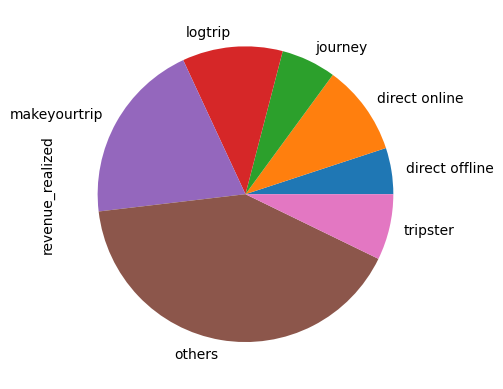

In [817]:
df_booking_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")